In [1]:

# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler,LabelEncoder

In [2]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "hypertension_dataset.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "ankushpanday1/hypertension-risk-prediction-dataset",
  file_path,
# Provide any additional arguments like
# sql_query or pandas_kwargs. See the
# documenation for more information:
# https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("First 5 records:", df.head())

/tmp/ipython-input-2769376314.py:10: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


100%|██████████| 18.1M/18.1M [00:00<00:00, 77.0MB/s]


First 5 records:      Country  Age   BMI  Cholesterol  Systolic_BP  Diastolic_BP  \
0         UK   58  29.5          230          160            79   
1      Spain   34  36.2          201          120            84   
2  Indonesia   73  18.2          173          156            60   
3     Canada   60  20.3          183          122            94   
4     France   73  21.8          296           91            97   

  Smoking_Status  Alcohol_Intake Physical_Activity_Level Family_History  ...  \
0          Never            27.9                     Low            Yes  ...   
1          Never            27.5                    High            Yes  ...   
2        Current             1.8                    High            Yes  ...   
3          Never            11.6                Moderate            Yes  ...   
4          Never            29.1                Moderate            Yes  ...   

  Sleep_Duration  Heart_Rate  LDL  HDL  Triglycerides  Glucose  Gender  \
0            6.1         

# Data Exploration

In [3]:
#number of rows and columns
df.shape

(174982, 23)

In [4]:
#show some rows
df.head()

Country  Age   BMI  Cholesterol  Systolic_BP  Diastolic_BP  \
0         UK   58  29.5          230          160            79   
1      Spain   34  36.2          201          120            84   
2  Indonesia   73  18.2          173          156            60   
3     Canada   60  20.3          183          122            94   
4     France   73  21.8          296           91            97   

  Smoking_Status  Alcohol_Intake Physical_Activity_Level Family_History  ...  \
0          Never            27.9                     Low            Yes  ...   
1          Never            27.5                    High            Yes  ...   
2        Current             1.8                    High            Yes  ...   
3          Never            11.6                Moderate            Yes  ...   
4          Never            29.1                Moderate            Yes  ...   

  Sleep_Duration  Heart_Rate  LDL  HDL  Triglycerides  Glucose  Gender  \
0            6.1          80  100   75             72      179  Female   
1            9.8          56   77   47             90      113    Male   
2            5.2          75  162   56             81      101    Male   
3            7.5          71  164   93             94      199  Female   
4            5.0          52  108   74            226      157  Female   

   Education_Level  Employment_Status Hypertension  
0          Primary         Unemployed         High  
1        Secondary         Unemployed         High  
2          Primary           Employed          Low  
3        Secondary            Retired         High  
4          Primary           Employed         High  

[5 rows x 23 columns]

In [5]:
#show columns
df.columns

Index(['Country', 'Age', 'BMI', 'Cholesterol', 'Systolic_BP', 'Diastolic_BP',
       'Smoking_Status', 'Alcohol_Intake', 'Physical_Activity_Level',
       'Family_History', 'Diabetes', 'Stress_Level', 'Salt_Intake',
       'Sleep_Duration', 'Heart_Rate', 'LDL', 'HDL', 'Triglycerides',
       'Glucose', 'Gender', 'Education_Level', 'Employment_Status',
       'Hypertension'],
      dtype='object')

In [6]:
#check datatype and notnull counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174982 entries, 0 to 174981
Data columns (total 23 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Country                  174982 non-null  object 
 1   Age                      174982 non-null  int64  
 2   BMI                      174982 non-null  float64
 3   Cholesterol              174982 non-null  int64  
 4   Systolic_BP              174982 non-null  int64  
 5   Diastolic_BP             174982 non-null  int64  
 6   Smoking_Status           174982 non-null  object 
 7   Alcohol_Intake           174982 non-null  float64
 8   Physical_Activity_Level  174982 non-null  object 
 9   Family_History           174982 non-null  object 
 10  Diabetes                 174982 non-null  object 
 11  Stress_Level             174982 non-null  int64  
 12  Salt_Intake              174982 non-null  float64
 13  Sleep_Duration           174982 non-null  float64
 14  Hear

In [7]:
#statistic on columns on numeric columns
df.describe()

Age            BMI    Cholesterol    Systolic_BP  \
count  174982.000000  174982.000000  174982.000000  174982.000000   
mean       53.493319      27.494672     224.539335     134.505229   
std        20.786353       7.213866      43.361589      26.019268   
min        18.000000      15.000000     150.000000      90.000000   
25%        36.000000      21.200000     187.000000     112.000000   
50%        54.000000      27.500000     225.000000     135.000000   
75%        71.000000      33.700000     262.000000     157.000000   
max        89.000000      40.000000     299.000000     179.000000   

        Diastolic_BP  Alcohol_Intake   Stress_Level    Salt_Intake  \
count  174982.000000   174982.000000  174982.000000  174982.000000   
mean       89.450315       14.991069       5.013041       8.482757   
std        17.310789        8.652624       2.582341       3.750074   
min        60.000000        0.000000       1.000000       2.000000   
25%        74.000000        7.500000       3.000000       5.200000   
50%        89.000000       15.000000       5.000000       8.500000   
75%       104.000000       22.500000       7.000000      11.700000   
max       119.000000       30.000000       9.000000      15.000000   

       Sleep_Duration     Heart_Rate            LDL            HDL  \
count   174982.000000  174982.000000  174982.000000  174982.000000   
mean         6.996468      74.495085     129.528271      64.573105   
std          1.730731      14.438573      34.635795      20.190666   
min          4.000000      50.000000      70.000000      30.000000   
25%          5.500000      62.000000     100.000000      47.000000   
50%          7.000000      74.000000     130.000000      65.000000   
75%          8.500000      87.000000     160.000000      82.000000   
max         10.000000      99.000000     189.000000      99.000000   

       Triglycerides        Glucose  
count  174982.000000  174982.000000  
mean      149.569836     134.488187  
std        57.765006      37.526882  
min        50.000000      70.000000  
25%       100.000000     102.000000  
50%       150.000000     134.000000  
75%       200.000000     167.000000  
max       249.000000     199.000000

In [8]:
#statistic on columns on categorical columns
df.describe(include=object)

Country Smoking_Status Physical_Activity_Level Family_History  \
count         174982         174982                  174982         174982   
unique            20              3                       3              2   
top     Saudi Arabia        Current                    High            Yes   
freq            8931          58574                   58462          87491   

       Diabetes  Gender Education_Level Employment_Status Hypertension  
count    174982  174982          174982            174982       174982  
unique        2       2               3                 3            2  
top          No  Female       Secondary           Retired         High  
freq      87738   87675           58633             58559       125781

In [9]:
#check for missing values
df.isna().sum()

Country                    0
Age                        0
BMI                        0
Cholesterol                0
Systolic_BP                0
Diastolic_BP               0
Smoking_Status             0
Alcohol_Intake             0
Physical_Activity_Level    0
Family_History             0
Diabetes                   0
Stress_Level               0
Salt_Intake                0
Sleep_Duration             0
Heart_Rate                 0
LDL                        0
HDL                        0
Triglycerides              0
Glucose                    0
Gender                     0
Education_Level            0
Employment_Status          0
Hypertension               0
dtype: int64

In [10]:
#check duplicates
df.duplicated().sum()

np.int64(0)

In [11]:
Target_Distribution = px.histogram(df, x="Hypertension",color="Hypertension" ,
                   title="Distribution of Hypertension",
                   barmode="group")
Target_Distribution.show()

In [12]:
Age_distribution = px.histogram(df, x="Age", nbins=20,color="Hypertension",
                   title="Age Distribution")
#    edges
Age_distribution.update_traces(marker=dict(line=dict(color="black", width=1.5)))
Age_distribution.show()

In [13]:
BMI_Distribution = px.histogram(df, x="BMI", nbins=20 ,
                   title="BMI Distribution", color="Hypertension")
#    edges
BMI_Distribution.update_traces(marker=dict(line=dict(color="black", width=1.5)))
BMI_Distribution.show()

In [14]:
# Systolic
#
fig = px.box(df, x="Hypertension", y="Systolic_BP",
             color="Hypertension",
             title="Systolic BP by Hypertension")
fig.show()

In [15]:
# Diastolic
fig = px.box(df, x="Hypertension", y="Diastolic_BP",
             color="Hypertension",
             title="Diastolic BP by Hypertension")
fig.show()

In [16]:
import plotly.figure_factory as ff
corr = df.corr(numeric_only=True)
fig = ff.create_annotated_heatmap( z=corr.values, x=list(corr.columns),
                                  y=list(corr.index), annotation_text=corr.round(2).values, colorscale="Viridis" )
fig.update_layout(title="Correlation Heatmap")
fig.show()

In [17]:
df['Hypertension'].value_counts()

Hypertension
High    125781
Low      49201
Name: count, dtype: int64

In [18]:
#Visualization

In [19]:
!pip install seaborn matplotlib scipy

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [21]:
df.head()

Country  Age   BMI  Cholesterol  Systolic_BP  Diastolic_BP  \
0         UK   58  29.5          230          160            79   
1      Spain   34  36.2          201          120            84   
2  Indonesia   73  18.2          173          156            60   
3     Canada   60  20.3          183          122            94   
4     France   73  21.8          296           91            97   

  Smoking_Status  Alcohol_Intake Physical_Activity_Level Family_History  ...  \
0          Never            27.9                     Low            Yes  ...   
1          Never            27.5                    High            Yes  ...   
2        Current             1.8                    High            Yes  ...   
3          Never            11.6                Moderate            Yes  ...   
4          Never            29.1                Moderate            Yes  ...   

  Sleep_Duration  Heart_Rate  LDL  HDL  Triglycerides  Glucose  Gender  \
0            6.1          80  100   75             72      179  Female   
1            9.8          56   77   47             90      113    Male   
2            5.2          75  162   56             81      101    Male   
3            7.5          71  164   93             94      199  Female   
4            5.0          52  108   74            226      157  Female   

   Education_Level  Employment_Status Hypertension  
0          Primary         Unemployed         High  
1        Secondary         Unemployed         High  
2          Primary           Employed          Low  
3        Secondary            Retired         High  
4          Primary           Employed         High  

[5 rows x 23 columns]

In [22]:
print("Dataset Information:")
print("=" * 50)
print(f"Dataset Shape: {df.shape}")
print(f"\nColumns: {df.columns.tolist()}")
print(f"\nData Types:\n{df.dtypes}")
print(f"\nMissing Values:\n{df.isnull().sum()}")

Dataset Information:
Dataset Shape: (174982, 23)

Columns: ['Country', 'Age', 'BMI', 'Cholesterol', 'Systolic_BP', 'Diastolic_BP', 'Smoking_Status', 'Alcohol_Intake', 'Physical_Activity_Level', 'Family_History', 'Diabetes', 'Stress_Level', 'Salt_Intake', 'Sleep_Duration', 'Heart_Rate', 'LDL', 'HDL', 'Triglycerides', 'Glucose', 'Gender', 'Education_Level', 'Employment_Status', 'Hypertension']

Data Types:
Country                     object
Age                          int64
BMI                        float64
Cholesterol                  int64
Systolic_BP                  int64
Diastolic_BP                 int64
Smoking_Status              object
Alcohol_Intake             float64
Physical_Activity_Level     object
Family_History              object
Diabetes                    object
Stress_Level                 int64
Salt_Intake                float64
Sleep_Duration             float64
Heart_Rate                   int64
LDL                          int64
HDL                          int

In [23]:
print("\nBasic Statistics:")
print("=" * 50)
print(df.describe())


Basic Statistics:
                 Age            BMI    Cholesterol    Systolic_BP  \
count  174982.000000  174982.000000  174982.000000  174982.000000   
mean       53.493319      27.494672     224.539335     134.505229   
std        20.786353       7.213866      43.361589      26.019268   
min        18.000000      15.000000     150.000000      90.000000   
25%        36.000000      21.200000     187.000000     112.000000   
50%        54.000000      27.500000     225.000000     135.000000   
75%        71.000000      33.700000     262.000000     157.000000   
max        89.000000      40.000000     299.000000     179.000000   

        Diastolic_BP  Alcohol_Intake   Stress_Level    Salt_Intake  \
count  174982.000000   174982.000000  174982.000000  174982.000000   
mean       89.450315       14.991069       5.013041       8.482757   
std        17.310789        8.652624       2.582341       3.750074   
min        60.000000        0.000000       1.000000       2.000000   
25%      

In [24]:
print("\nHypertension Distribution:")
print("=" * 50)
print(df['Hypertension'].value_counts())


Hypertension Distribution:
Hypertension
High    125781
Low      49201
Name: count, dtype: int64


Text(0.5, 1.0, 'Distribution of Hypertension Cases')

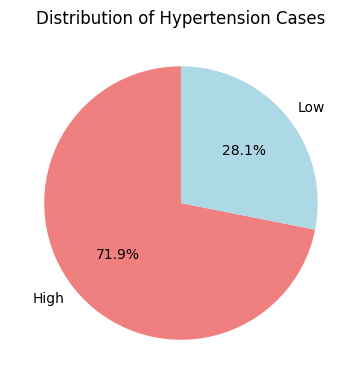

In [25]:
# 1. Hypertension Distribution Pie Chart
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
hypertension_counts = df['Hypertension'].value_counts()
plt.pie(hypertension_counts.values, labels=hypertension_counts.index, autopct='%1.1f%%',
         startangle=90, colors=['lightcoral', 'lightblue'])
plt.title('Distribution of Hypertension Cases')

/tmp/ipython-input-3244798391.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




Text(0, 0.5, 'Age')

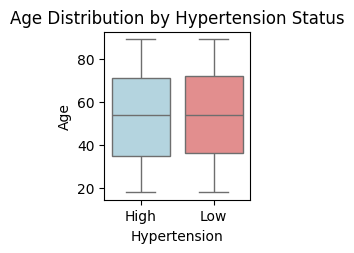

In [26]:
# 2. Age Distribution by Hypertension
plt.subplot(2, 3, 2)
sns.boxplot(data=df, x='Hypertension', y='Age', palette=['lightblue', 'lightcoral'])
plt.title('Age Distribution by Hypertension Status')
plt.ylabel('Age')

/tmp/ipython-input-1245617837.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




Text(0, 0.5, 'BMI')

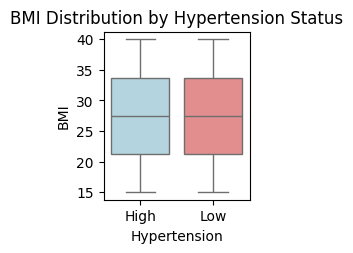

In [27]:
# 3. BMI Distribution
plt.subplot(2, 3, 3)
sns.boxplot(data=df, x='Hypertension', y='BMI', palette=['lightblue', 'lightcoral'])
plt.title('BMI Distribution by Hypertension Status')
plt.ylabel('BMI')

Text(0, 0.5, 'Diastolic BP (mmHg)')

/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.



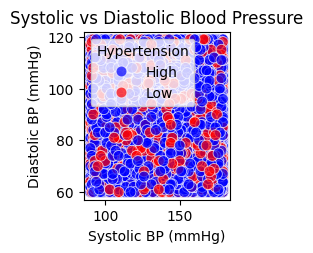

In [28]:
# 4. Blood Pressure Scatter Plot
plt.subplot(2, 3, 4)
sns.scatterplot(data=df, x='Systolic_BP', y='Diastolic_BP', hue='Hypertension',
               palette=['blue', 'red'], alpha=0.7, s=60)
plt.title('Systolic vs Diastolic Blood Pressure')
plt.xlabel('Systolic BP (mmHg)')
plt.ylabel('Diastolic BP (mmHg)')

Text(0.5, 0, 'Cholesterol Level')

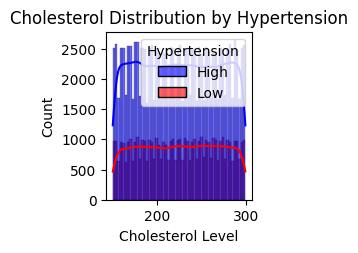

In [29]:
# 5. Cholesterol Distribution
plt.subplot(2, 3, 5)
sns.histplot(data=df, x='Cholesterol', hue='Hypertension', kde=True,
             alpha=0.6, palette=['blue', 'red'])
plt.title('Cholesterol Distribution by Hypertension')
plt.xlabel('Cholesterol Level')

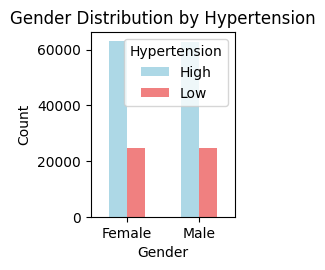

In [30]:
# 6. Gender Distribution by Hypertension
plt.subplot(2, 3, 6)
gender_hypertension = pd.crosstab(df['Gender'], df['Hypertension'])
gender_hypertension.plot(kind='bar', ax=plt.gca(), color=['lightblue', 'lightcoral'])
plt.title('Gender Distribution by Hypertension')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Hypertension')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

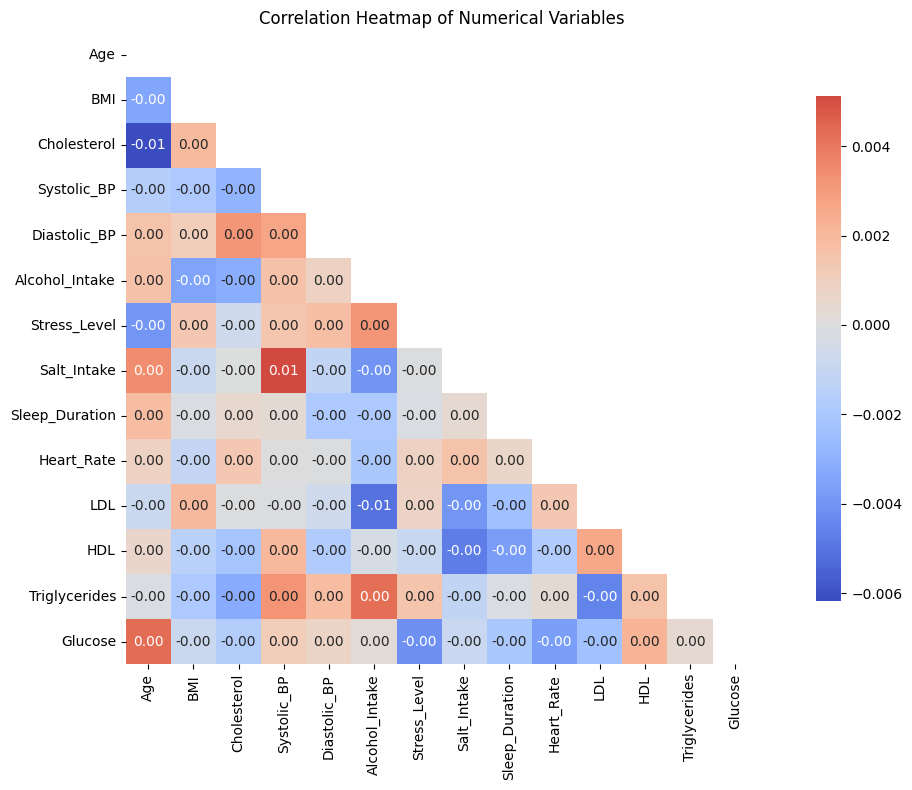

In [31]:
# 7. Correlation Heatmap (Numerical variables only)
plt.figure(figsize=(12, 8))
numerical_cols = ['Age', 'BMI', 'Cholesterol', 'Systolic_BP', 'Diastolic_BP',
                 'Alcohol_Intake', 'Stress_Level', 'Salt_Intake', 'Sleep_Duration',
                 'Heart_Rate', 'LDL', 'HDL', 'Triglycerides', 'Glucose']

correlation_matrix = df[numerical_cols].corr()

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', center=0,
           square=True, fmt='.2f', cbar_kws={'shrink': 0.8})
plt.title('Correlation Heatmap of Numerical Variables')
plt.tight_layout()
plt.show()

/tmp/ipython-input-3215217852.py:46: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipython-input-3215217852.py:52: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




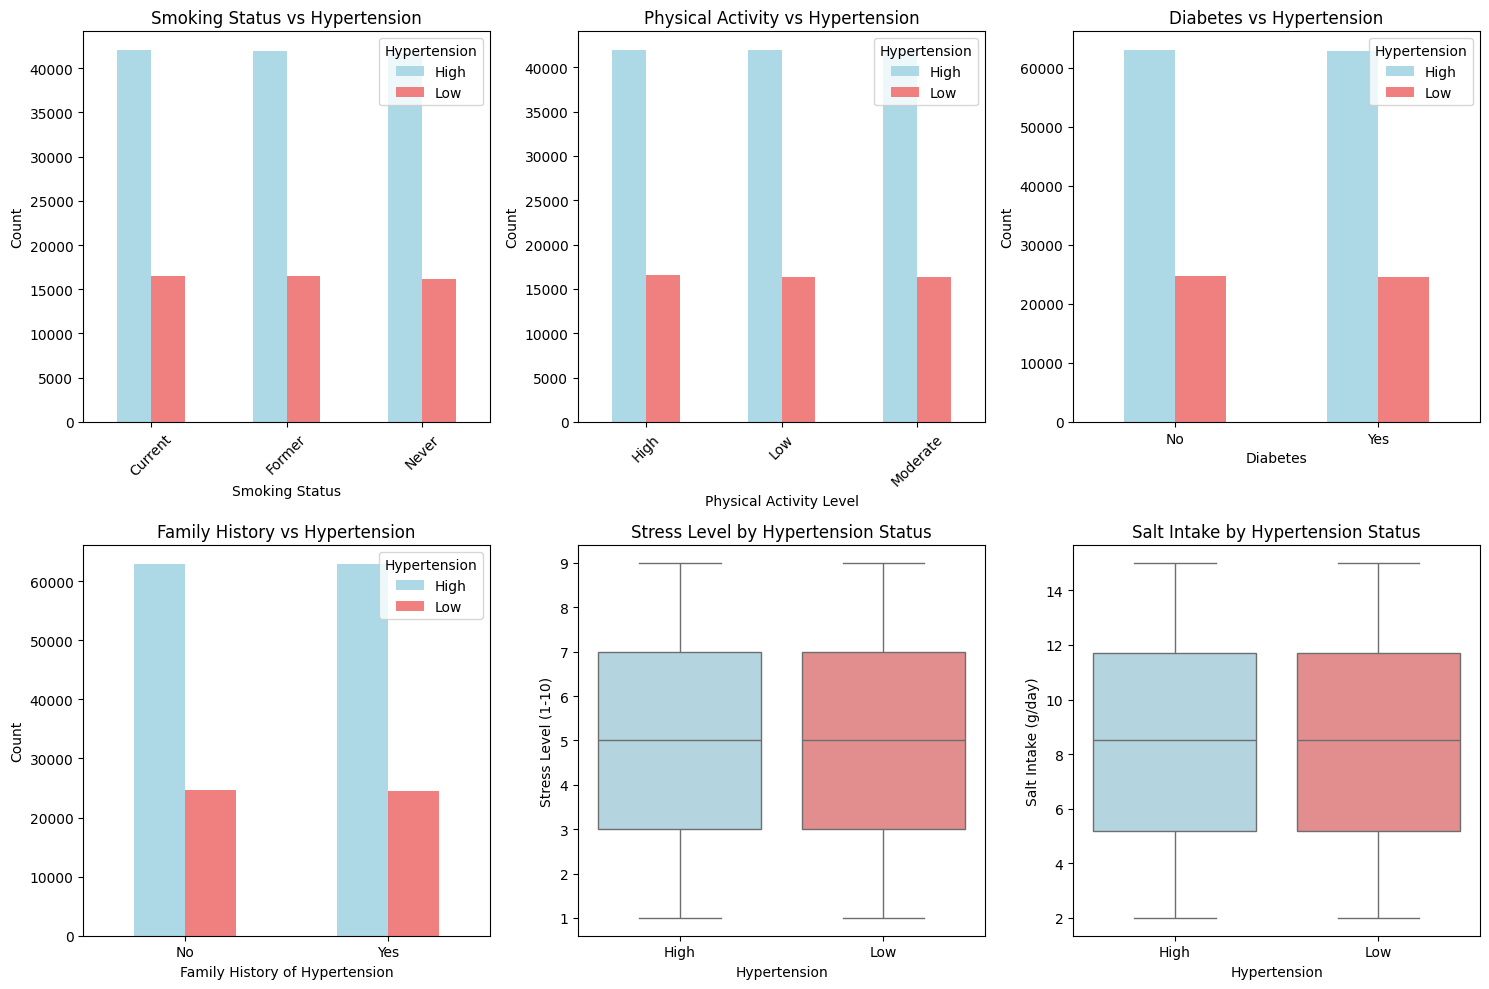

In [32]:
# 8. Lifestyle Factors vs Hypertension
plt.figure(figsize=(15, 10))

# Smoking Status
plt.subplot(2, 3, 1)
smoking_hypertension = pd.crosstab(df['Smoking_Status'], df['Hypertension'])
smoking_hypertension.plot(kind='bar', ax=plt.gca(), color=['lightblue', 'lightcoral'])
plt.title('Smoking Status vs Hypertension')
plt.xlabel('Smoking Status')
plt.ylabel('Count')
plt.legend(title='Hypertension')
plt.xticks(rotation=45)

# Physical Activity
plt.subplot(2, 3, 2)
activity_hypertension = pd.crosstab(df['Physical_Activity_Level'], df['Hypertension'])
activity_hypertension.plot(kind='bar', ax=plt.gca(), color=['lightblue', 'lightcoral'])
plt.title('Physical Activity vs Hypertension')
plt.xlabel('Physical Activity Level')
plt.ylabel('Count')
plt.legend(title='Hypertension')
plt.xticks(rotation=45)

# Diabetes
plt.subplot(2, 3, 3)
diabetes_hypertension = pd.crosstab(df['Diabetes'], df['Hypertension'])
diabetes_hypertension.plot(kind='bar', ax=plt.gca(), color=['lightblue', 'lightcoral'])
plt.title('Diabetes vs Hypertension')
plt.xlabel('Diabetes')
plt.ylabel('Count')
plt.legend(title='Hypertension')
plt.xticks(rotation=0)

# Family History
plt.subplot(2, 3, 4)
family_hypertension = pd.crosstab(df['Family_History'], df['Hypertension'])
family_hypertension.plot(kind='bar', ax=plt.gca(), color=['lightblue', 'lightcoral'])
plt.title('Family History vs Hypertension')
plt.xlabel('Family History of Hypertension')
plt.ylabel('Count')
plt.legend(title='Hypertension')
plt.xticks(rotation=0)

# Stress Level
plt.subplot(2, 3, 5)
sns.boxplot(data=df, x='Hypertension', y='Stress_Level', palette=['lightblue', 'lightcoral'])
plt.title('Stress Level by Hypertension Status')
plt.ylabel('Stress Level (1-10)')

# Salt Intake
plt.subplot(2, 3, 6)
sns.boxplot(data=df, x='Hypertension', y='Salt_Intake', palette=['lightblue', 'lightcoral'])
plt.title('Salt Intake by Hypertension Status')
plt.ylabel('Salt Intake (g/day)')

plt.tight_layout()
plt.show()

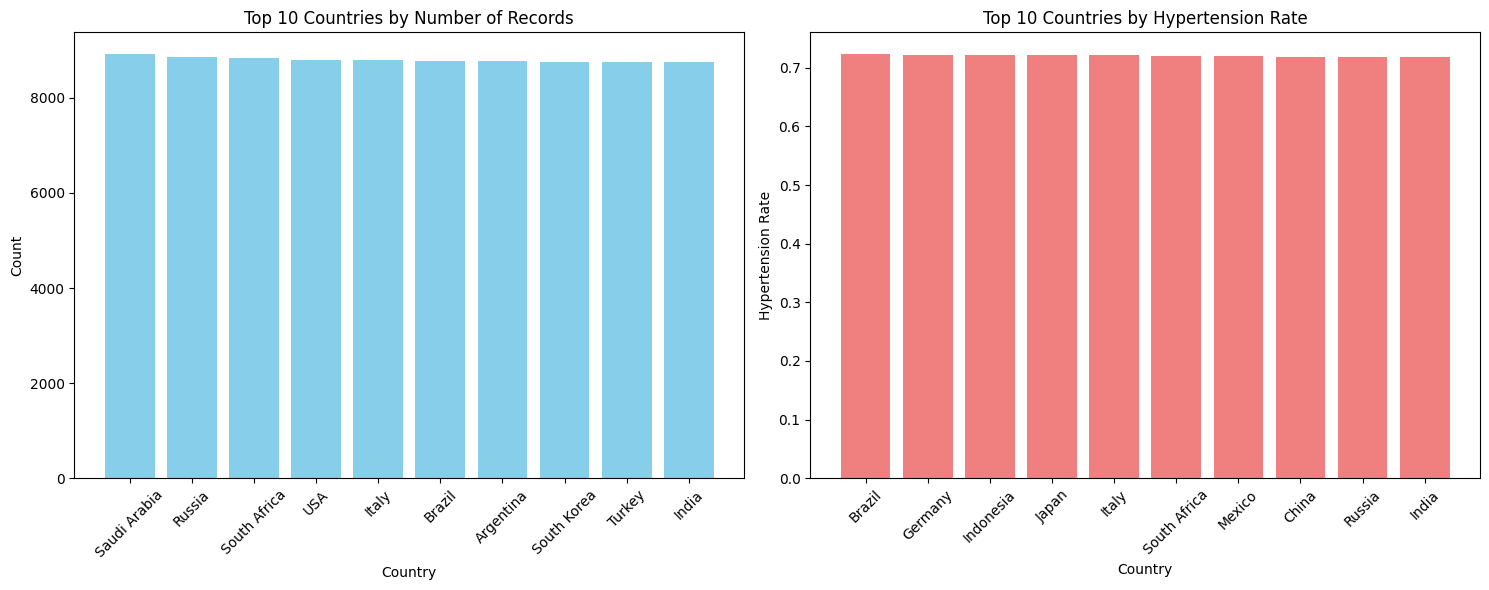

In [33]:
# 9. Country-wise Analysis (Top 10 countries)
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
country_counts = df['Country'].value_counts().head(10)
plt.bar(country_counts.index, country_counts.values, color='skyblue')
plt.title('Top 10 Countries by Number of Records')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
# Hypertension rate by country (for countries with sufficient data)
country_hypertension = df.groupby('Country')['Hypertension'].value_counts(normalize=True).unstack()
country_hypertension = country_hypertension['High'].sort_values(ascending=False).head(10)
plt.bar(country_hypertension.index, country_hypertension.values, color='lightcoral')
plt.title('Top 10 Countries by Hypertension Rate')
plt.xlabel('Country')
plt.ylabel('Hypertension Rate')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

/tmp/ipython-input-2527714842.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipython-input-2527714842.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipython-input-2527714842.py:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipython-input-2527714842.py:17: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipython-input-2527714842.py:21: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and

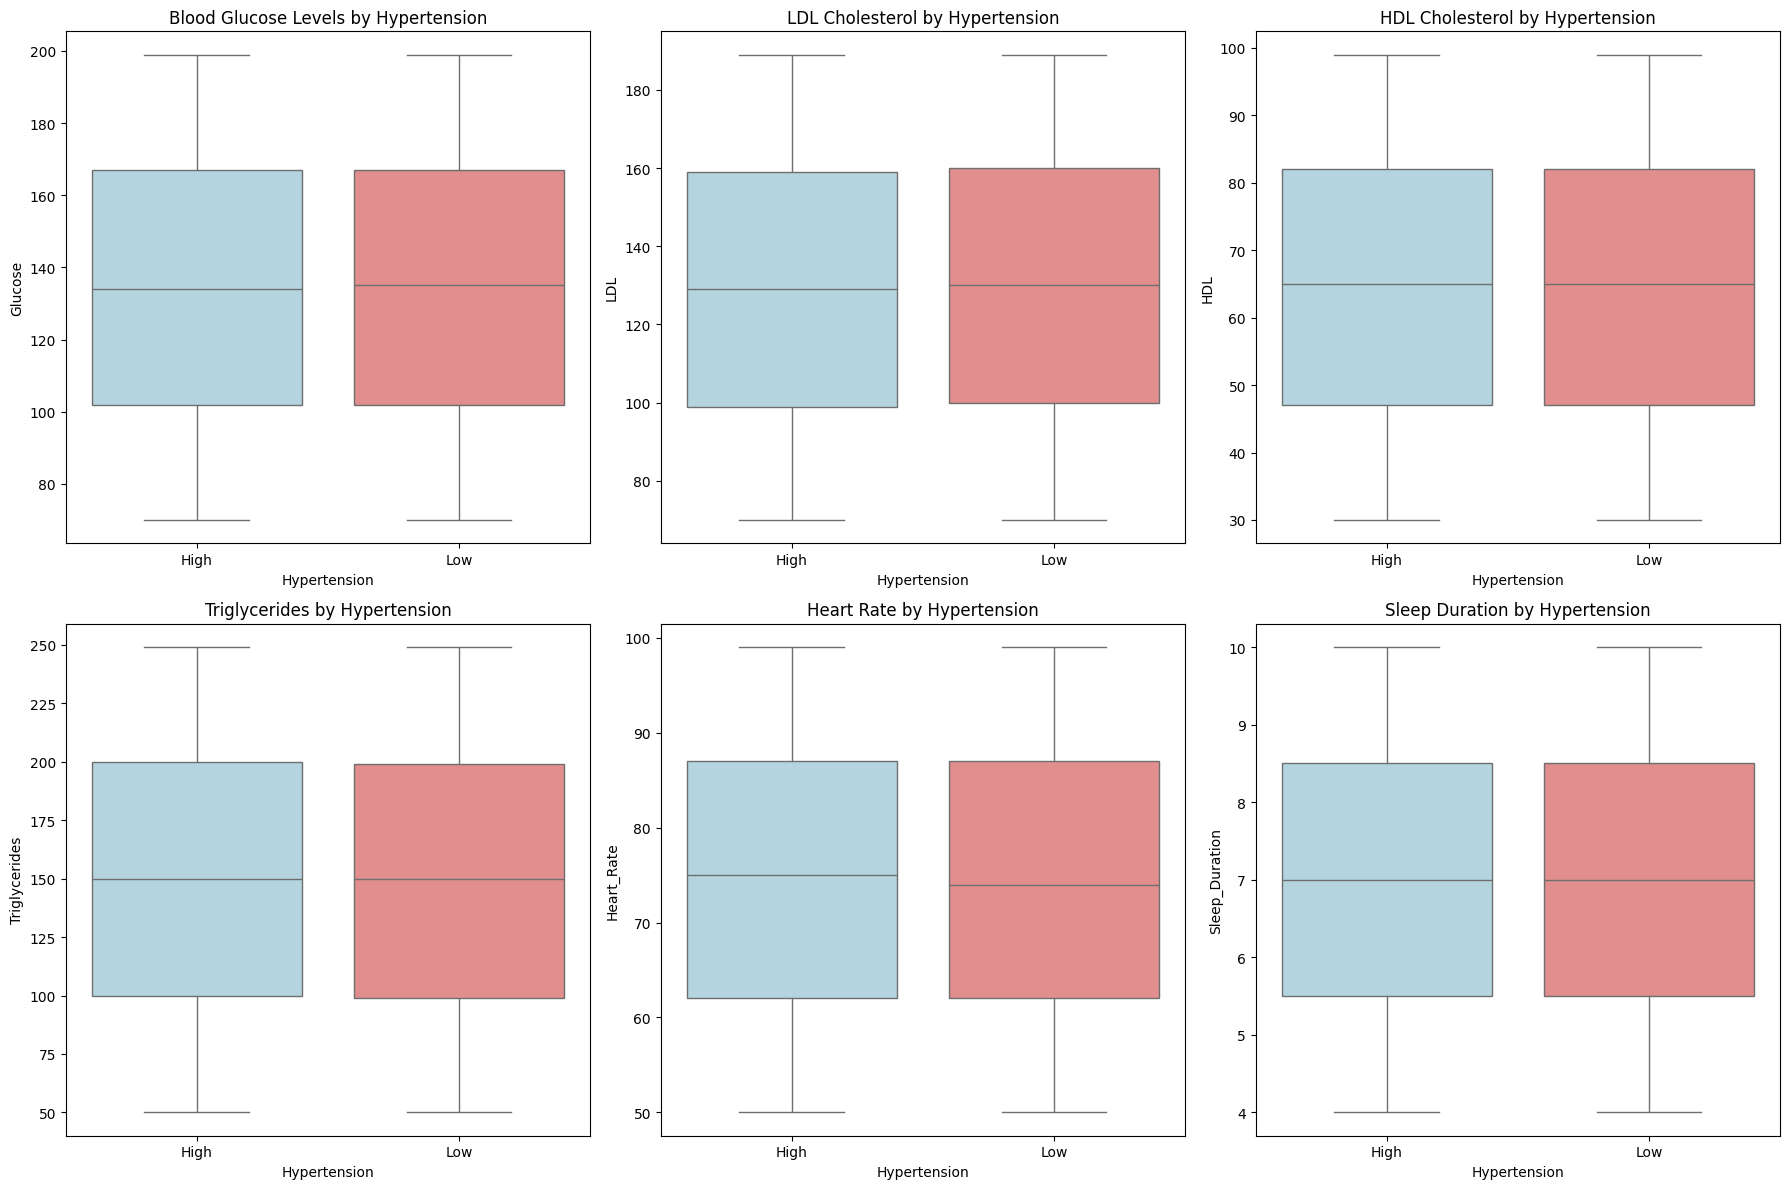


STATISTICAL SUMMARY

T-Test Results (High vs Low Hypertension Groups):
--------------------------------------------------
Age             | t-stat:  -1.391 | p-value:   0.1643 | Not Significant
BMI             | t-stat:  -0.424 | p-value:   0.6712 | Not Significant
Systolic_BP     | t-stat:  -1.082 | p-value:   0.2795 | Not Significant
Diastolic_BP    | t-stat:   0.871 | p-value:   0.3840 | Not Significant
Cholesterol     | t-stat:  -1.685 | p-value:   0.0919 | Not Significant
Stress_Level    | t-stat:  -0.196 | p-value:   0.8443 | Not Significant

Risk Factor Prevalence in Hypertension Groups:
--------------------------------------------------

Smoking_Status:
Hypertension     High    Low
Smoking_Status              
Current         71.81  28.19
Former          71.77  28.23
Never           72.08  27.92

Diabetes:
Hypertension   High    Low
Diabetes                  
No            71.81  28.19
Yes           71.96  28.04

Family_History:
Hypertension     High    Low
Family_History     

In [34]:
# 10. Detailed Analysis of Key Health Metrics
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Glucose vs Hypertension
sns.boxplot(data=df, x='Hypertension', y='Glucose', ax=axes[0,0], palette=['lightblue', 'lightcoral'])
axes[0,0].set_title('Blood Glucose Levels by Hypertension')

# LDL Cholesterol
sns.boxplot(data=df, x='Hypertension', y='LDL', ax=axes[0,1], palette=['lightblue', 'lightcoral'])
axes[0,1].set_title('LDL Cholesterol by Hypertension')

# HDL Cholesterol
sns.boxplot(data=df, x='Hypertension', y='HDL', ax=axes[0,2], palette=['lightblue', 'lightcoral'])
axes[0,2].set_title('HDL Cholesterol by Hypertension')

# Triglycerides
sns.boxplot(data=df, x='Hypertension', y='Triglycerides', ax=axes[1,0], palette=['lightblue', 'lightcoral'])
axes[1,0].set_title('Triglycerides by Hypertension')

# Heart Rate
sns.boxplot(data=df, x='Hypertension', y='Heart_Rate', ax=axes[1,1], palette=['lightblue', 'lightcoral'])
axes[1,1].set_title('Heart Rate by Hypertension')

# Sleep Duration
sns.boxplot(data=df, x='Hypertension', y='Sleep_Duration', ax=axes[1,2], palette=['lightblue', 'lightcoral'])
axes[1,2].set_title('Sleep Duration by Hypertension')

plt.tight_layout()
plt.show()

# Statistical Summary
print("\n" + "="*60)
print("STATISTICAL SUMMARY")
print("="*60)

# T-tests for key variables
print("\nT-Test Results (High vs Low Hypertension Groups):")
print("-" * 50)

key_variables = ['Age', 'BMI', 'Systolic_BP', 'Diastolic_BP', 'Cholesterol', 'Stress_Level']

for var in key_variables:
    high_group = df[df['Hypertension'] == 'High'][var]
    low_group = df[df['Hypertension'] == 'Low'][var]

    t_stat, p_value = stats.ttest_ind(high_group, low_group, nan_policy='omit')

    print(f"{var:15} | t-stat: {t_stat:7.3f} | p-value: {p_value:8.4f} | {'Significant' if p_value < 0.05 else 'Not Significant'}")

# Risk Factor Analysis
print("\nRisk Factor Prevalence in Hypertension Groups:")
print("-" * 50)

risk_factors = ['Smoking_Status', 'Diabetes', 'Family_History']

for factor in risk_factors:
    cross_tab = pd.crosstab(df[factor], df['Hypertension'], normalize='index') * 100
    print(f"\n{factor}:")
    print(cross_tab.round(2))

print("\n" + "="*60)
print("KEY INSIGHTS:")
print("="*60)
print("1. Check the correlation heatmap for relationships between variables")
print("2. Look for significant differences in means between hypertension groups")
print("3. Analyze lifestyle factors and their association with hypertension")
print("4. Consider demographic patterns across countries and genders")

# Data preprocessing

In [35]:
df.head()

Country  Age   BMI  Cholesterol  Systolic_BP  Diastolic_BP  \
0         UK   58  29.5          230          160            79   
1      Spain   34  36.2          201          120            84   
2  Indonesia   73  18.2          173          156            60   
3     Canada   60  20.3          183          122            94   
4     France   73  21.8          296           91            97   

  Smoking_Status  Alcohol_Intake Physical_Activity_Level Family_History  ...  \
0          Never            27.9                     Low            Yes  ...   
1          Never            27.5                    High            Yes  ...   
2        Current             1.8                    High            Yes  ...   
3          Never            11.6                Moderate            Yes  ...   
4          Never            29.1                Moderate            Yes  ...   

  Sleep_Duration  Heart_Rate  LDL  HDL  Triglycerides  Glucose  Gender  \
0            6.1          80  100   75             72      179  Female   
1            9.8          56   77   47             90      113    Male   
2            5.2          75  162   56             81      101    Male   
3            7.5          71  164   93             94      199  Female   
4            5.0          52  108   74            226      157  Female   

   Education_Level  Employment_Status Hypertension  
0          Primary         Unemployed         High  
1        Secondary         Unemployed         High  
2          Primary           Employed          Low  
3        Secondary            Retired         High  
4          Primary           Employed         High  

[5 rows x 23 columns]

In [36]:
num_cols=df.select_dtypes(include='number').columns

In [37]:
num_cols

Index(['Age', 'BMI', 'Cholesterol', 'Systolic_BP', 'Diastolic_BP',
       'Alcohol_Intake', 'Stress_Level', 'Salt_Intake', 'Sleep_Duration',
       'Heart_Rate', 'LDL', 'HDL', 'Triglycerides', 'Glucose'],
      dtype='object')

In [38]:
scaler=StandardScaler()
for col in num_cols:
  df[[col]] = scaler.fit_transform(df[[col]])

In [39]:
df.head()

Country       Age       BMI  Cholesterol  Systolic_BP  Diastolic_BP  \
0         UK  0.216810  0.277983     0.125934     0.979845     -0.603690   
1      Spain -0.937797  1.206753    -0.542863    -0.557482     -0.314852   
2  Indonesia  0.938440 -1.288449    -1.188598     0.826112     -1.701274   
3     Canada  0.313027 -0.997342    -0.957978    -0.480616      0.262824   
4     France  0.938440 -0.789409     1.648022    -1.672044      0.436127   

  Smoking_Status  Alcohol_Intake Physical_Activity_Level Family_History  ...  \
0          Never        1.491914                     Low            Yes  ...   
1          Never        1.445685                    High            Yes  ...   
2        Current       -1.524521                    High            Yes  ...   
3          Never       -0.391913                Moderate            Yes  ...   
4          Never        1.630600                Moderate            Yes  ...   

  Sleep_Duration  Heart_Rate       LDL       HDL  Triglycerides   Glucose  \
0      -0.517972    0.381266 -0.852539  0.516423      -1.342856  1.186135   
1       1.619859   -1.280953 -1.516594 -0.870360      -1.031247 -0.572609   
2      -1.037985    0.034970  0.937522 -0.424609      -1.187051 -0.892381   
3       0.290937   -0.242067  0.995266  1.407927      -0.962001  1.719088   
4      -1.153544   -1.557990 -0.621563  0.466895       1.323126  0.599887   

   Gender  Education_Level  Employment_Status Hypertension  
0  Female          Primary         Unemployed         High  
1    Male        Secondary         Unemployed         High  
2    Male          Primary           Employed          Low  
3  Female        Secondary            Retired         High  
4  Female          Primary           Employed         High  

[5 rows x 23 columns]

In [40]:
df.drop("Country",axis=1,inplace=True)

In [41]:
#Encoding
category_cols=df.select_dtypes(include='object').columns

In [42]:
le=LabelEncoder ()
for col in category_cols:
     df[col]=le.fit_transform(df[col])

In [43]:
category_cols

Index(['Smoking_Status', 'Physical_Activity_Level', 'Family_History',
       'Diabetes', 'Gender', 'Education_Level', 'Employment_Status',
       'Hypertension'],
      dtype='object')

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,  confusion_matrix,classification_report

In [45]:
#split the data
x=df.drop('Hypertension',axis=1)
y=df['Hypertension']

**Modeling**

In [46]:
# split for training and testing
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [47]:
scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])
print("Scale_Pos_Weight =", scale_pos_weight)


Scale_Pos_Weight = 2.558082788671024


In [48]:
!pip install xgboost

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,  confusion_matrix

In [50]:
model=LogisticRegression()
model.fit(x_train,y_train)


LogisticRegression()

In [51]:
#  the predection of the model
y_pred=model.predict(x_test)

In [52]:
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)


print("Accuracy:", acc)
print("Confusion Matrix:\n", cm)
print(classification_report(y_test,y_pred))

Accuracy: 0.7185255738641776
Confusion Matrix:
 [[37719     0]
 [14776     0]]
              precision    recall  f1-score   support

           0       0.72      1.00      0.84     37719
           1       0.00      0.00      0.00     14776

    accuracy                           0.72     52495
   macro avg       0.36      0.50      0.42     52495
weighted avg       0.52      0.72      0.60     52495



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [53]:
model = DecisionTreeClassifier(max_depth=5)
model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [54]:
y_pred=model.predict(x_test)

In [55]:
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy:", acc)
print("Confusion Matrix:\n", cm)
print(classification_report(y_test,y_pred))

Accuracy: 0.718392227831222
Confusion Matrix:
 [[37691    28]
 [14755    21]]
              precision    recall  f1-score   support

           0       0.72      1.00      0.84     37719
           1       0.43      0.00      0.00     14776

    accuracy                           0.72     52495
   macro avg       0.57      0.50      0.42     52495
weighted avg       0.64      0.72      0.60     52495



In [56]:
model=RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier()

In [57]:
y_pred=model.predict(x_test)

In [58]:
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy:", acc)
print("Confusion Matrix:\n", cm)

Accuracy: 0.7185446232974569
Confusion Matrix:
 [[37718     1]
 [14774     2]]


In [59]:
model = XGBClassifier(
    scale_pos_weight=scale_pos_weight,
    random_state=42,
    n_estimators=300,
    learning_rate=0.05,
    max_depth=5
)

model.fit(x_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=300,
              n_jobs=None, num_parallel_tree=None, ...)

In [60]:
y_pred=model.predict(x_test)

In [61]:
from sklearn.metrics import precision_recall_curve


Threshold | Accuracy | Recall(class1)
0.10 | 0.281 | 1.000
0.15 | 0.281 | 1.000
0.20 | 0.281 | 1.000
0.25 | 0.282 | 1.000
0.30 | 0.282 | 0.999
0.35 | 0.283 | 0.997
0.40 | 0.289 | 0.985
0.45 | 0.320 | 0.913
0.50 | 0.529 | 0.434
0.55 | 0.701 | 0.040
0.60 | 0.717 | 0.004
0.65 | 0.718 | 0.000
0.70 | 0.719 | 0.000
0.75 | 0.719 | 0.000
0.80 | 0.719 | 0.000
0.85 | 0.719 | 0.000


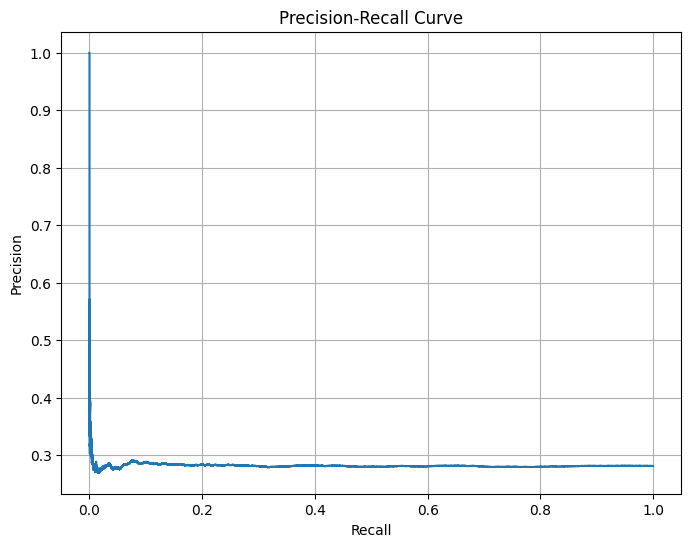

In [62]:
#  Thresholds
y_proba = model.predict_proba(x_test)[:, 1]

thresholds = np.arange(0.1, 0.9, 0.05)

results = []

for t in thresholds:
    y_pred = (y_proba >= t).astype(int)

    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()
    recall_1 = tp / (tp + fn)  # Recall

    results.append((t, acc, recall_1))

#  Results
print("Threshold | Accuracy | Recall(class1)")
for r in results:
    print(f"{r[0]:.2f} | {r[1]:.3f} | {r[2]:.3f}")

# plot Precision-Recall Curve
precision, recall, pr_thresholds = precision_recall_curve(y_test, y_proba)

plt.figure(figsize=(8,6))
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.grid(True)
plt.show()

In [63]:
y_proba = model.predict_proba(x_test)[:,1]

threshold = 0.30
y_pred = (y_proba >= threshold).astype(int)


In [64]:
ac=accuracy_score(y_test,y_pred)
cm=confusion_matrix(y_test,y_pred)
print("Accuracy:",ac)
print("Accuracy_train:", model.score(x_train,y_train))
print("Confusion Matrix:\n",cm)
print(classification_report(y_test,y_pred))

Accuracy: 0.28191256310124774
Accuracy_train: 0.646117547168271
Confusion Matrix:
 [[   33 37686]
 [   10 14766]]
              precision    recall  f1-score   support

           0       0.77      0.00      0.00     37719
           1       0.28      1.00      0.44     14776

    accuracy                           0.28     52495
   macro avg       0.52      0.50      0.22     52495
weighted avg       0.63      0.28      0.12     52495



In [73]:
import pickle

with open("model.pkl", "wb") as f:
    pickle.dump(model, f)

In [74]:
import pickle

with open("model.pkl", "rb") as f:
    xgb_model = pickle.load(f)

In [75]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), category_cols)
    ]
)


In [76]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", xgb_model)
])


In [79]:
# Explanation of the error:
# The `ValueError: A given column is not a column of the dataframe`
# accompanied by `KeyError: 'Hypertension'` indicates that the `ColumnTransformer`
# (which is part of the `pipeline`) was configured to process a column named 'Hypertension',
# but this column is missing from the `x_train` DataFrame provided during fitting.
#
# The root cause is that the `category_cols` list (or `num_cols` list, though less likely)
# used to define the `preprocessor` in a preceding cell (`wO10X7dWr1iy`)
# incorrectly included 'Hypertension' at the time of its instantiation.
#
# Additionally, it's important to note that `x_train` itself has already undergone
# manual preprocessing (numerical columns scaled, categorical columns label-encoded
# to numerical values). Therefore, applying a `ColumnTransformer` with `StandardScaler`
# and `OneHotEncoder` to this already-transformed data is redundant and semantically
# incorrect, as it would attempt to re-scale already scaled data and one-hot encode
# numerical representations of categories.
#
# Fix for the selected cell (to address the KeyError and allow execution):
# To resolve the `KeyError` and enable `pipeline.fit()` to execute, we need to redefine
# the `preprocessor` and `pipeline` objects ensuring that the column lists passed to
# the `ColumnTransformer` strictly match the feature columns present in `x_train`.
# Given that `x_train` contains only numerical data (due to prior transformations),
# the `OneHotEncoder` part of the `ColumnTransformer` would be effectively empty or misapplied.
# For the purpose of getting this specific cell to run without the KeyError,
# we will instantiate `ColumnTransformer` to reflect the *current* state of `x_train`.

# Redefine num_cols and category_cols based on the actual columns in `x_train`
# All columns in x_train are numerical after previous preprocessing steps.
numerical_cols_for_ct = x_train.columns.tolist()
categorical_cols_for_ct = [] # No object-type columns left in x_train for OneHotEncoder

# Redefine the preprocessor with the corrected column lists
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_cols_for_ct), # This will re-scale already scaled data
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols_for_ct) # This will do nothing as list is empty
    ],
    remainder='passthrough' # Ensure other columns (if any) are passed through
)

# Redefine the pipeline with the corrected preprocessor.
# We assume the user intends to use the `xgb_model` (trained on X_processed) in this pipeline.
# The `model` variable in the kernel state points to LogisticRegression, so we explicitly use `xgb_model`.
pipeline = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", xgb_model) # Use the correct, already trained XGBoost model
])

# Now fit the corrected pipeline.
# This will execute without the KeyError: 'Hypertension', though the ColumnTransformer
# is redundant given that x_train is already transformed.
pipeline.fit(x_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['Age', 'BMI', 'Cholesterol',
                                                   'Systolic_BP',
                                                   'Diastolic_BP',
                                                   'Smoking_Status',
                                                   'Alcohol_Intake',
                                                   'Physical_Activity_Level',
                                                   'Family_History', 'Diabetes',
                                                   'Stress_Level',
                                                   'Salt_Intake',
                                                   'Sleep_Duration',
                                                   'Heart_Rate', 'LDL', 'HDL',
                                                   'Triglycerides', 'Glucose'...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.05,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=5, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=300, n_jobs=None,
                               num_parallel_tree=None, ...))])

In [80]:
with open("xgb_pipeline.pkl", "wb") as f:
    pickle.dump(pipeline, f)
